## Fossils and Paleoshorelines

### Overview
This notebook goes through:
- accessing gpml files directly from github and bringing them in to a pygplates workflow
- creating a subset of a feature collection
- carrying out point in polygon tests
- a brief introduction to spatial proximity tests (ie calculating the minimum distance between points and polygons

First, get some paleoshoreline data. The files can be found in the github repository of ex-Earthbyter Christian Heine. 

You can read about the dataset in more detail here:
https://www.researchgate.net/publication/274253868_Evaluating_global_paleoshoreline_models_for_the_Cretaceous_and_Cenozoic

In [2]:
import requests
from io import StringIO
import matplotlib.pyplot as plt
import pandas as pd
import pygplates
import numpy as np

%matplotlib inline


filename = 'Global_Paleoshorelines_Golonka.gpml'

# Note the bit at the end of the url, 'raw=True', which is required to get the file contents back without some 
# unwanted html code mixed up with it
url = 'https://github.com/chhei/Heine_AJES_15_GlobalPaleoshorelines/blob/master/Global_Paleoshorelines_Golonka.gpml?raw=true'

# Note that the next three lines are not really that necessary - all they do is download the contents 
# of a file from github onto your local machine, save it into a new file on your local file system,
# then load it with pygplates. However, consider how this may be useful if you were running this
# script remotely 'in the cloud' 
r = requests.get(url)
f = open(filename,'w')
f.write(r.content)

psl_features = pygplates.FeatureCollection(filename)


Now that you have the paleoshorelines gpml file in your local machine, you can open it in GPlates, which is a good way to see what is inside the file. Try loading it now, and once loaded, try animating the reconstruction time from 150 to 0 Ma.

Having viewed the file in GPlates, it should be easier to relate what you see within GPlates to what is happening in the next cell. We write a for loop that iterates over each feature, and prints out some information about each one. In this case, it shows us that each feature is described as a paleoshoreline, and the 'valid_time' for each one is different.

In [3]:
for feature in psl_features:
    
    print feature.get_description()
    print feature.get_valid_time()
    

Paleoshoreline
(12.8, 1.8)
Paleoshoreline
(22.0, 12.8)
Paleoshoreline
(30.2, 22.0)
Paleoshoreline
(36.6, 30.2)
Paleoshoreline
(48.5, 36.6)
Paleoshoreline
(58.4, 48.6)
Paleoshoreline
(83.8, 58.4)
Paleoshoreline
(98.0, 83.8)
Paleoshoreline
(123.0, 98.0)
Paleoshoreline
(139.0, 123.0)
Paleoshoreline
(147.8, 139.0)


For the purposes of this exercise, we are going to consider the paleoshorelines as an interpretation that we want to test, and the fossils as a set of 'data' that we can use to test that interpretation.

THe following is a simple example of how, given a collection of features and some selection criteria, we can create a new list of features that only includes a subset of the original list. We do this by creating an empty list, then appending to this list only the features where the 'valid time' of the feature is within a specified range [as we can see from the above cell, only one feature collection will pass this test]. 


In [4]:
psl_for_time = []
for polygon_feature in psl_features:
    if polygon_feature.get_valid_time()[0]>97 and polygon_feature.get_valid_time()[1]<90:
        print polygon_feature.get_valid_time()
        psl_for_time.append(polygon_feature)

(98.0, 83.8)


### Load some fossil data

Repeat the same steps that we went through before to get some fossil data. In this case, the request specifies the time range for which to get fossils using the 'max_ma' and 'min_ma' parameters.



In [5]:
r = requests.get('https://paleobiodb.org/data1.2/occs/list.csv?datainfo&rowcount&max_ma=97&min_ma=90&show=coords,env')

print r.text

"Data Provider","The Paleobiology Database"
"Data Source","The Paleobiology Database"
"Data License","Creative Commons CC-BY"
"License URL","http://creativecommons.org/licenses/by/4.0/"
"Documentation URL","http://paleobiodb.org/data1.2/occs/list_doc.html"
"Data URL","http://paleobiodb.org/data1.2/occs/list.csv?datainfo&rowcount&max_ma=97&min_ma=90&show=coords,env"
"Access Time","Mon 2017-03-13 02:16:08 GMT"
"Title","PBDB Data Service"
"Parameters:"
"","min_ma","90"
"","max_ma","97"
"","timerule","major"
"","taxon_status","all"
"","show","coords,env"
"Elapsed Time","5.1"
"Records Found","20654"
"Records Returned","20654"
"Records:"
"occurrence_no","record_type","reid_no","flags","collection_no","identified_name","identified_rank","identified_no","difference","accepted_name","accepted_rank","accepted_no","early_interval","late_interval","max_ma","min_ma","reference_no","lng","lat","environment"
"24998","occ","","","1784","Desmoceras cf. argonauticum","species","14762","species not enter

The data that get returned are in csv format, though with some extra lines of text at the start which describe the request that was used to access them. 

In the next line, the argument 'skiprows' is used to tell pandas to ignore the first 18 rows (which are the csv description), and start reading in at the 19th line where the column descriptions are contained. 


In [6]:
df = pd.read_csv(StringIO(r.text),skiprows=18)

df

occurrence_no record_type  reid_no flags  collection_no  \
0              24998         occ      NaN   NaN           1784   
1              24999         occ      NaN   NaN           1784   
2              25000         occ      NaN   NaN           1784   
3              25001         occ      NaN   NaN           1784   
4              25002         occ      NaN   NaN           1784   
5              25003         occ      NaN   NaN           1784   
6              25004         occ      NaN   NaN           1784   
7              25005         occ      NaN   NaN           1784   
8              25006         occ      NaN   NaN           1784   
9              25007         occ      NaN   NaN           1784   
10             25008         occ      NaN   NaN           1784   
11             25009         occ      NaN   NaN           1786   
12             25010         occ      NaN   NaN           1786   
13             25011         occ      NaN   NaN           1786   
14             25012         occ      NaN   NaN           1786   
15             25013         occ      NaN   NaN           1786   
16             25014         occ      NaN   NaN           1786   
17             25015         occ      NaN   NaN           1786   
18             25016         occ      NaN   NaN           1787   
19             25017         occ      NaN   NaN           1787   
20             25018         occ      NaN   NaN           1787   
21             25019         occ      NaN   NaN           1787   
22             25020         occ      NaN   NaN           1787   
23             25021         occ      NaN   NaN           1787   
24             25022         occ      NaN   NaN           1788   
25             25023         occ      NaN   NaN           1788   
26             25024         occ      NaN   NaN           1788   
27             25025         occ      NaN   NaN           1788   
28             25026         occ      NaN   NaN           1788   
29             25027         occ      NaN   NaN           1789   
...              ...         ...      ...   ...            ...   
20624        1357186         occ      NaN   NaN         184305   
20625        1357194         occ      NaN   NaN         172900   
20626        1357195         occ      NaN   NaN         172900   
20627        1357560         occ      NaN   NaN         161726   
20628        1357561         occ      NaN   NaN         184414   
20629        1357648         occ      NaN   NaN         184444   
20630        1357649         occ      NaN   NaN         184444   
20631        1357653         occ      NaN   NaN         184449   
20632        1357654         occ      NaN   NaN         184449   
20633        1357655         occ      NaN   NaN         184448   
20634        1357656         occ      NaN   NaN         184448   
20635        1357657         occ      NaN   NaN         184448   
20636        1357658         occ      NaN   NaN         184450   
20637        1357732         occ      NaN   NaN         165561   
20638        1357817         occ      NaN   NaN         178121   
20639        1357818         occ      NaN   NaN         111688   
20640        1357936         occ      NaN   NaN         123113   
20641        1357937         occ      NaN   NaN         123113   
20642        1357938         occ      NaN   NaN         123113   
20643        1357939         occ      NaN   NaN         178121   
20644        1357940         occ      NaN   NaN         178121   
20645        1357942         occ      NaN   NaN         123054   
20646        1358143         occ      NaN   NaN         161726   
20647        1358144         occ      NaN   NaN         184509   
20648        1358145         occ      NaN   NaN         184509   
20649        1358191         occ      NaN   NaN         184518   
20650        1358192         occ      NaN   NaN         184519   
20651        1358193         occ      NaN   NaN         184520   
20652        1358194         occ      NaN   NaN

In [7]:
fossil_point_features = []
for index,row in df.iterrows():
    point = pygplates.PointOnSphere(float(row.lat),float(row.lng))
    point_feature = pygplates.Feature()
    point_feature.set_geometry(point)
    fossil_point_features.append(point_feature)

InvalidLatLonError: invalid latitude value nan

Hmmmmm, an error. For some reason, the database contains values where one of the coordinates is 'nan' (not a number). GPlates does not know what to do with points that have no coordinates. 

To fix this, we can modify the dataframe to elliminate any row where either the lat or long is nan, using the dataframe method 'dropna'


In [8]:
df = df.dropna(subset=['lat','lng'])

fossil_point_features = []
for index,row in df.iterrows():
    point = pygplates.PointOnSphere(float(row.lat),float(row.lng))
    point_feature = pygplates.Feature()
    point_feature.set_geometry(point)
    fossil_point_features.append(point_feature)

### Comparing paleoshoreline interpretations to fossil environments

We now have two datasets:
1. some polygons that define which areas are likely to be above sea-level, and which below sea-level, at different times in the geological past
2. some points that provide an indication of the same thing, based on fossils (And the sedimentary rocks they were found in)

The next step is to ask the question, 'do these two data sets agree with each other?'

To do this, we need to distinguish between points that are inside the paleoshoreline polygons (in which case, we expect the fossil environment to be non-marine), and those which are outside (should give a marine environment)

[As an aside - note that in this case, the 'paleo'shorelines are defined in present-day coordinates, they are not reconstructed. The fossils are also defined in their present-day coordinates. So, in this particular case, we don't need to worry about reconstructing any of the data to their paleo-coordinates. However, this will not always be the case] 


In [9]:
# create an empty list, the results will be appended incrementally
pip_test_results = []

# iterate over each fossil point feature
for point_feature in fossil_point_features:

    # for each point, start by setting the test to 'False'. If the point is in any polygon, the 
    # code will reach the line where the value is instead set to True, otherwise it will stay False
    within_polygon = False
    
    # For this point, loop over each polygon feature. A polygon feature may have more than one polygon
    # within it (ie a multipart feature), so we must loop over each part as well
    for polygon_feature in psl_for_time:
        for geometry in polygon_feature.get_geometries():
            
            if geometry.is_point_in_polygon(point_feature.get_geometry()):
                within_polygon = True
                
    # append the result, which will be either True or False
    pip_test_results.append(within_polygon)


print pip_test_results


[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, Tru

To visualise what these results look like, lets try plotting the points, and the polygons.

The code below makes a quick plot that shows points, with color coding to show which points are in the polygons and which one are outside.

Note that the few lines of code below illustrates some useful concepts about indexing
- each polygon geometry has a method 'geometry.to_lat_lon_array()', which is an array of coordinates that has two columns, one for latitude and one for longitude. The code 
> geometry.to_lat_lon_array()[:,1]

  extracts all the values in the second column (longitudes). Note also the potential for confusion between GPlates features (where latitude comes before longitude) and most plotting commands, where the x-axis coordinate comes first.
- we can use a boolean (True or False) array to index into another array of equal length and return only the 'True' entries. Hence, 
> df.lng[pip_test_results] 

  will extract only the longitudes in the dataframe where the corresponding row in 'pip_test_results' is True
- to reverse this logic, we can convert the pip_test_results array into a numpy array then use the '~' operator (which means 'not') to reverse True to False and vice versa


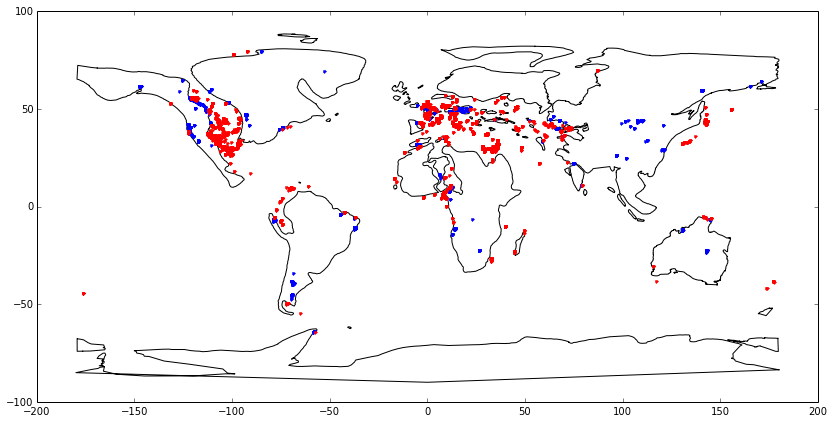

In [10]:
plt.figure(figsize=(14,7))
# Plot the polygons, one at a time, by iterating over the features and accessing the coordinates for 
# each polygon separately
for polygon_feature in psl_for_time:
        for geometry in polygon_feature.get_geometries():
            plt.plot(geometry.to_lat_lon_array()[:,1],geometry.to_lat_lon_array()[:,0],'k')
# Plot the points
plt.plot(df.lng[pip_test_results],df.lat[pip_test_results],'b.')
plt.plot(df.lng[~np.array(pip_test_results)],df.lat[~np.array(pip_test_results)],'r.')
plt.show()


The map shows that all the points have been successfully classified according to whether they are inside or outside the paleoshoreline.

What have we learned? The problem at the moment is that we include all the fossils, regardless of the depositional environment, so we cannot tell whether we are expecting these points to above or below sea-level.

### Exercise

- Repeat the above analysis, but for subsets of the fossil data that you think can be classified as 'marine' or 'non-marine' according to the listed environment
- Compute a number that quantifies the proportion of fossils that are consistent versus inconsistent for a given time range
- Repeat this process for other time steps. Can you create a function that automates the process of determing the consistency quantification?  
  
  
- Also: think about some of the limitations of this analysis - for example, uncertainties over the time ranges that each paleoshoreline represents, uncertainties in fossil ages, biases in the distribution of fossils. The paleobiology database allows you to download fossils as either 'occurences' or 'collections' - which did you use, what is the difference, and which would be more appropriate for this analysis?
- From a programming point of view, consider whether the function pygplates.PlatePartitioner would be a better choice to perform the same computation, and why.


Total number of marine fossils = 5206
Total number of marine fossils that fall inside paleoshorelines = 1258


/usr/local/lib/python2.7/dist-packages/pandas/core/internals.py:252: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 20646 but corresponding boolean dimension is 5206
  return self.values[slicer]
/usr/local/lib/python2.7/dist-packages/pandas/indexes/base.py:1434: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 20646 but corresponding boolean dimension is 5206
  result = getitem(key)


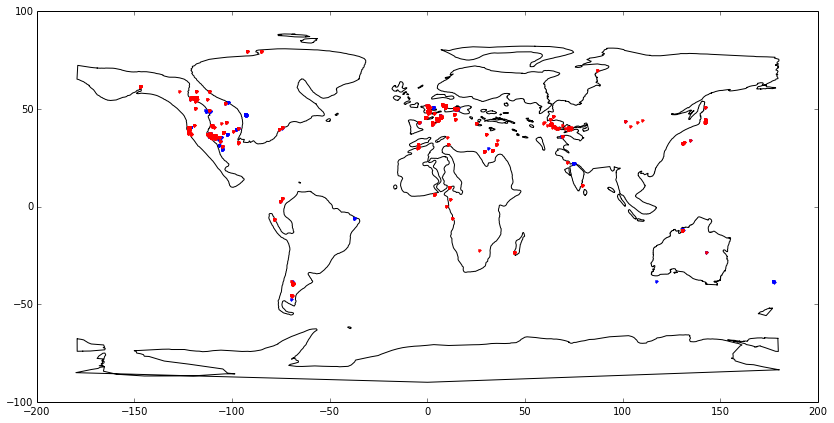

In [11]:
## SOLUTION
# And note that the first line here can be simply modified for some other environment type,
# for example 'reef' or 'shoreface', etc
subset = df.where(df.environment.str.contains('marine'))
subset = subset.dropna(subset=['lat','lng'])

marine_fossil_point_features = []
for index,row in subset.iterrows():
    point = pygplates.PointOnSphere(float(row.lat),float(row.lng))
    point_feature = pygplates.Feature()
    point_feature.set_geometry(point)
    marine_fossil_point_features.append(point_feature)

# create an empty list, the results will be appended incrementally
pip_test_results = []

# iterate over each fossil point feature
for point_feature in marine_fossil_point_features:

    # for each point, start by setting the test to 'False'. If the point is in any polygon, the 
    # code will reach the line where the value is instead set to True, otherwise it will stay False
    within_polygon = False
    
    # For this point, loop over each polygon feature. A polygon feature may have more than one polygon
    # within it (ie a multipart feature), so we must loop over each part as well
    for polygon_feature in psl_for_time:
        for geometry in polygon_feature.get_geometries():
            
            if geometry.is_point_in_polygon(point_feature.get_geometry()):
                within_polygon = True
                
    # append the result, which will be either True or False
    pip_test_results.append(within_polygon)

print 'Total number of marine fossils = %d' % len(pip_test_results)
print 'Total number of marine fossils that fall inside paleoshorelines = %d' % sum(pip_test_results)

plt.figure(figsize=(14,7))
for polygon_feature in psl_for_time:
        for geometry in polygon_feature.get_geometries():
            plt.plot(geometry.to_lat_lon_array()[:,1],geometry.to_lat_lon_array()[:,0],'k')
plt.plot(df.lng[pip_test_results],df.lat[pip_test_results],'b.')
plt.plot(df.lng[~np.array(pip_test_results)],df.lat[~np.array(pip_test_results)],'r.')
plt.show()


### Bonus exercise

Take a look at the code in the following cell - what is it doing, and why might it be useful in this analysis?

In [12]:
for point_feature in fossil_point_features:

    min_distance_to_polygon_edge = None
    
    # look for distance to nearest boundary - only happens if the point does NOT
    # satisfy the criteria (ie inside if we want inside, or outside if we want outside)
    for polygon_feature in psl_for_time:
        for geometry in polygon_feature.get_geometries():

            min_distance_to_feature = pygplates.GeometryOnSphere.distance(
                point_feature.get_geometry(),
                geometry,
                min_distance_to_polygon_edge)
            
            if min_distance_to_feature is not None:
                min_distance_to_polygon_edge = min_distance_to_feature
                
    print min_distance_to_polygon_edge


0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.0188867661052
0.018886